In [91]:
from residualphase import ResidualPhase
import librosa
import matplotlib.pyplot as plt
import sounddevice as sd

## Load audio

We load a sample audio file from librosa. $y$ contains the wave data and $sr$ the sample rate.

In [92]:
y, sr = librosa.load(librosa.util.example_audio_file(), offset=30, duration=4.45)

In [115]:
print(sr)

22050


## Calculation residual phase

The residual phase is calculated from the linear prediction (LP) reidual of a wave signal $^{[1]}$. <br>
The calculation of LP residual is equal to the error between the actual signal $s(n)$ and the LP-predicted value $\hat{s}(n) $ given by  <br>

$r(n) = s(n) - \hat{s}(n) = s(n) - \sum_{k=1}^p a_k s(n-k) $, <br>

where $p$ is the order of prediction and $a_k$ are the linear prediction coefficients obtained from LP analysis. <br>
The analytic signal, as well as the original and the LP signals are plotted below. <br> 

[1] https://doi.org/10.1016/j.eswa.2009.02.040

/Users/alessandro/projects/coding/venv/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


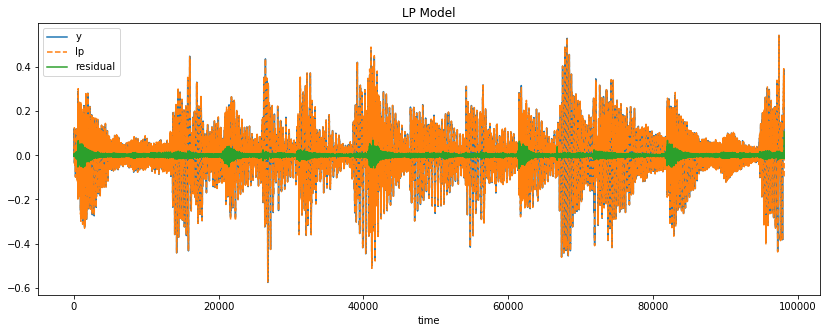

In [112]:
plt.figure(figsize=(14, 5))
plt.plot(y ,label='y')
plt.plot(lp, linestyle='--', label='lp')
plt.plot(r, linestyle='-', label='residual')
plt.title('LP Model')
plt.xlabel('time')
plt.legend()
plt.show()

Once we have the LP residual, its analytical repreentation is obtained by: <br>

$r_a(n) =  r(n) + j r_h (n) $,

where $j r_h (n)$ is the Hilbert transform of r(n). <br>
Froom this, the residual phase is defined as the cosine of the phase function of the analytic signal:

$\cos (\theta (n)) = \frac{Re[r_a (n)]}{|r_a (n)|} .$

In [113]:
RP = ResidualPhase()

res_phase = RP.calculate(y)
lp = RP.get_lp()
r = RP.get_residual()
r_a = RP.get_analytic_signal()

The residual phase signal contains excitation source features that are complementary to features extracted from vocal tract characteristics. <br>
Plotting the spectra of the original, and LP residual, one notices that the latter contains weights distributed acoross more components. <br>

In speech recognition, for instance, one can view the speech as the joint contribution of both vocal tract system and excitation source. This could reveal additional information present in the speech such as speaker emotion.

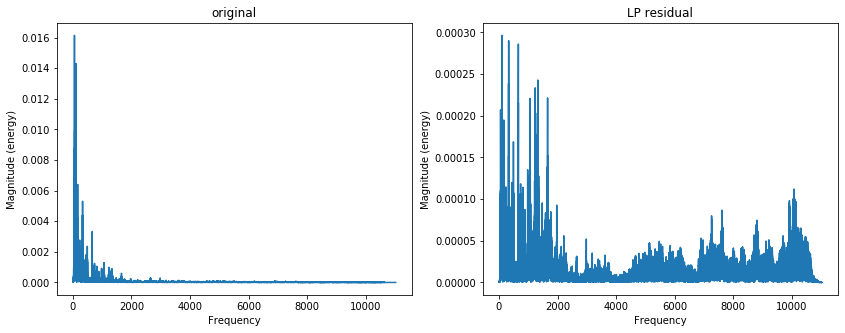

In [109]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.title('original')
plt.magnitude_spectrum(y, Fs=sr) 
plt.subplot(1, 2, 2)
plt.title('LP residual')
plt.magnitude_spectrum(r, Fs=sr) 
plt.show()